In [3]:
import networkx as nx

import pandas as pd
from operator import itemgetter
import matplotlib.pyplot as plt
import collections
from community import community_louvain
from networkx.algorithms.community.centrality import girvan_newman
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Util functions to describe graphs 

In [24]:
# Helper function for printing various graph properties
def describe_graph(G):
    print(G)
    if nx.is_connected(G):
        print("Avg. Shortest Path Length: %.4f" %nx.average_shortest_path_length(G))
        print("Diameter: %.4f" %nx.diameter(G)) # Longest shortest path
    else:
        print("Graph is not connected")
        print("Diameter and Avg shortest path length are not defined!")
    print("Sparsity: %.4f" %nx.density(G))  # #edges/#edges-complete-graph
    # #closed-triplets(3*#triangles)/#all-triplets
    print("Global clustering coefficient aka Transitivity: %.4f" %nx.transitivity(G))

In [28]:
# Helper function for visualizing the graph
def visualize_graph(G, with_labels=True, k=None, alpha=1.0, node_shape='o'):
    #nx.draw_spring(G, with_labels=with_labels, alpha = alpha)
    pos = nx.spring_layout(G, k=k)
    if with_labels:
        lab = nx.draw_networkx_labels(G, pos, labels=dict([(n, n) for n in G.nodes()]))
    ec = nx.draw_networkx_edges(G, pos, alpha=alpha)
    nc = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color='g', node_shape=node_shape)
    plt.axis('off')

## Example

[Networkx tutorial](https://networkx.org/documentation/stable/tutorial.html#creating-a-graph) --> go to Reference for documentation of functions

Graph with 4 nodes and 5 edges
Avg. Shortest Path Length: 1.1667
Diameter: 2.0000
Sparsity: 0.8333
Global clustering coefficient aka Transitivity: 0.7500


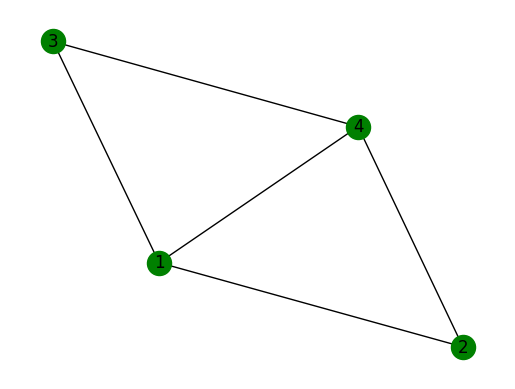

In [83]:
G = nx.Graph([(1, 2, {"color": "yellow"}), (1, 3, {'color': 'orange'}), (2, 4, {'color': 'red'}), (3, 4, {'color': 'blue'}), (1, 4)])
describe_graph(G)
visualize_graph(G)

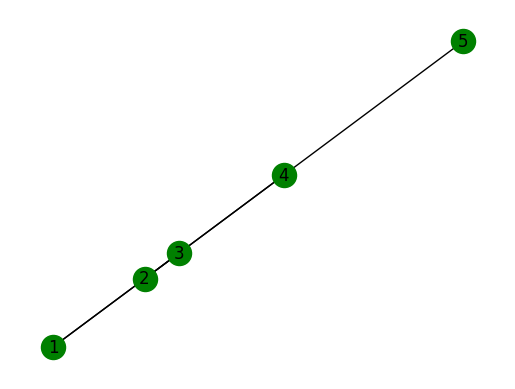

In [56]:
G.add_edge(1, 2, weight=4.7 )
visualize_graph(G)

AtlasView({2: {'color': 'red'}, 3: {'color': 'red', 'weight': 4.2}, 5: {'color': 'red'}})

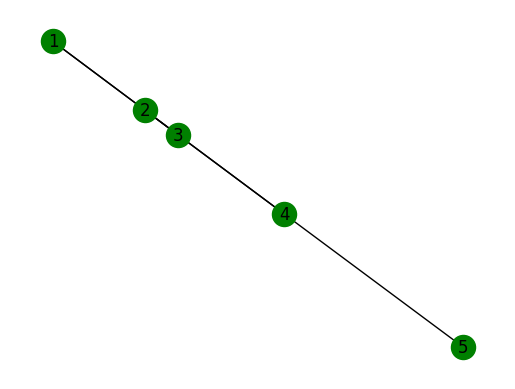

In [57]:
G.add_edges_from([(3, 4), (4, 5)], color='red')
visualize_graph(G)
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

G[4] # --> gives list of neighbors of node 4 along with the attributes of the edges between nnode 4 and its neighbors

In [79]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
print(f"out degree: {DG.out_degree(1, weight='weight')}") 
print(f"in degree: {DG.in_degree(1, weight='weight')}")
print(f"degree: {DG.degree(1, weight='weight')}") # degree is the sum of in and out degree! 

degrees = dict(DG.degree())
print(degrees)
print(f"list(.values()) --> {list(degrees.values())} and .keys() --> {degrees.keys()}")

print("out degrees:", dict(DG.out_degree()))
print("in degrees:", dict(DG.in_degree()))

dict(nx.all_pairs_shortest_path(DG))

out degree: 0.5
in degree: 0.75
degree: 1.25
{1: 2, 2: 1, 3: 1}
list(.values()) --> [2, 1, 1] and .keys() --> dict_keys([1, 2, 3])
out degrees: {1: 1, 2: 0, 3: 1}
in degrees: {1: 1, 2: 1, 3: 0}


{1: {1: [1], 2: [1, 2]}, 2: {2: [2]}, 3: {3: [3], 1: [3, 1], 2: [3, 1, 2]}}

In [82]:
nx.degree_histogram(DG)

[0, 2, 1]